# Random Forest Classification

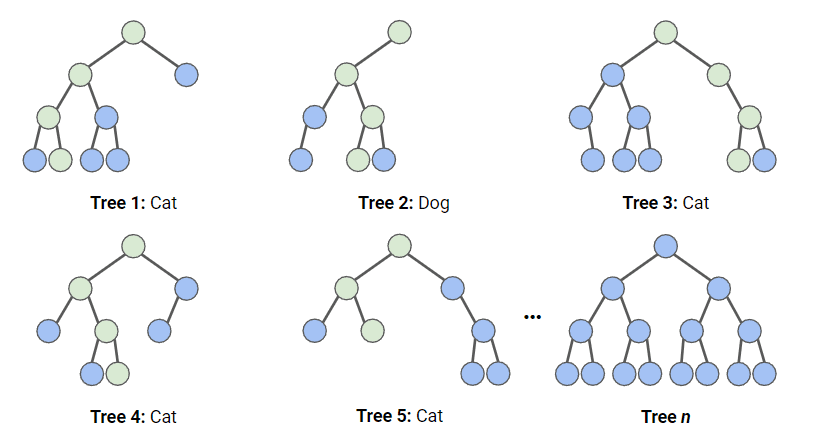

Similar to random forest regression, it will first create a **bootstrapped datase**t(**same size as the original**) by **randomly select samples** from the original dataset(can have the **same sample more than once**). Then create a decision tree using this dataset by using only a **random subset of featuress** at each step. **Repeat the above steps** by creaing a certain number of decision trees; thus, when estimating the values from the features, we would consider all the results from these decision trees and choose the one with **majority** of them.

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Random Forest Classification model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting a new result

In [ ]:
print(classifier.predict(sc.transform([[30, 87000]])))

[0]


## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

0.91

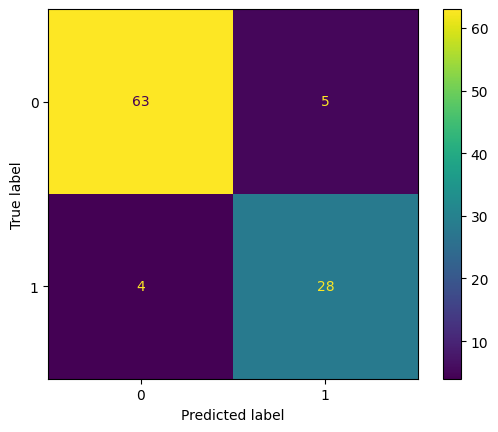

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]).plot()
accuracy_score(y_test, y_pred)

## Visualising the Training set results

<ipython-input-9-a3f77984e8e6>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)


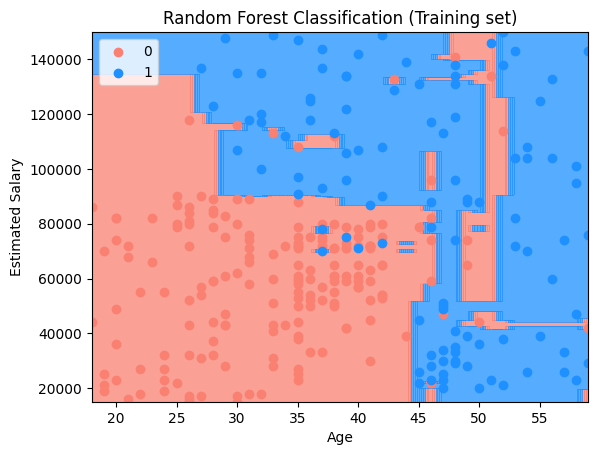

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min(), stop=X_set[:,0].max(), step=1),
                     np.arange(start=X_set[:,1].min(), stop=X_set[:,1].max(), step=1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('salmon', 'dodgerblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

<ipython-input-10-6d891101ad3d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)


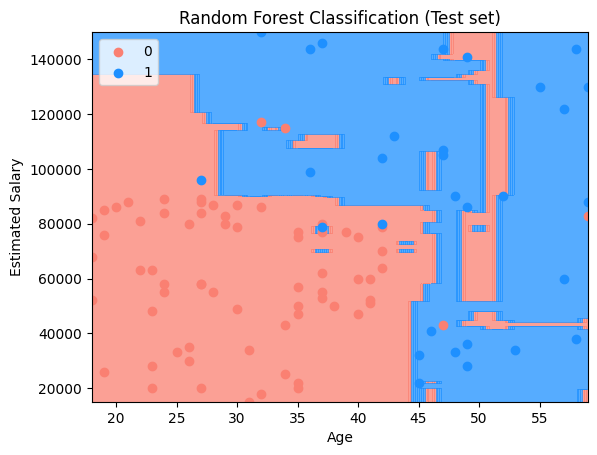

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min(), stop=X_set[:,0].max(), step=1),
                     np.arange(start=X_set[:,1].min(), stop=X_set[:,1].max(), step=1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

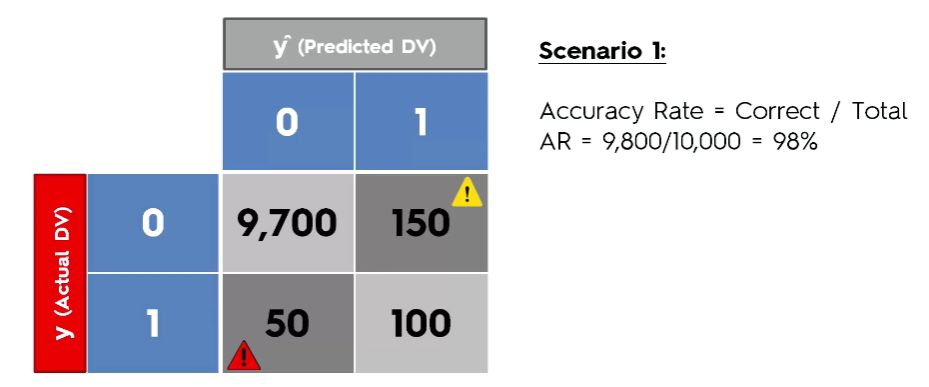

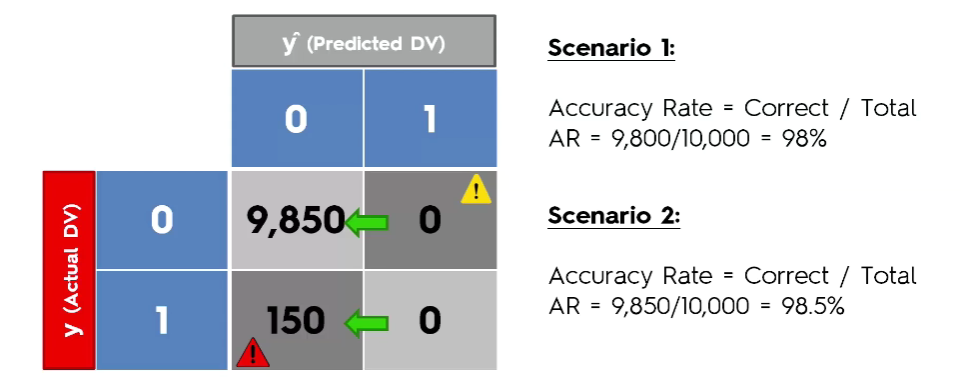

### Accuracy paradox

**Accuracy paradox:** **increasing in accuracy rate does not mean that it is a better model** as demontrated above. Because of this, we can use another way to analyze the **performance of classification model.**

### Cumulative Accuracy Profile

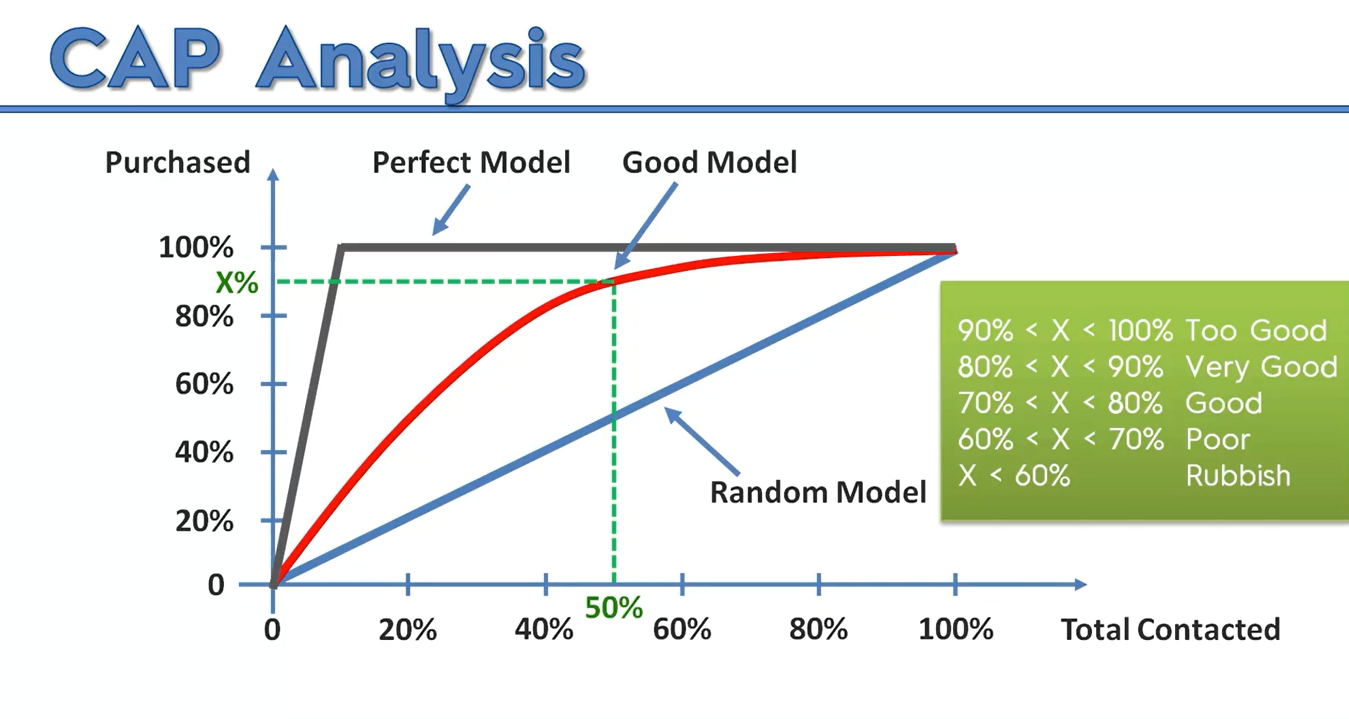

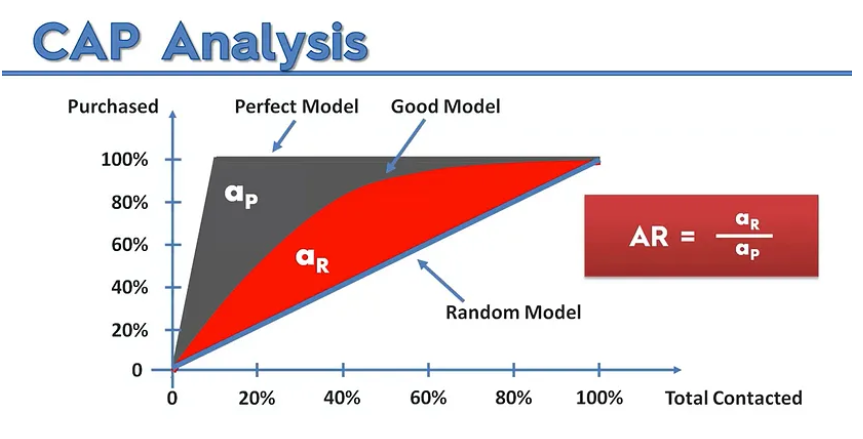

**CAP** is used to visualize the **discriminative power of a model.** The CAP curve analysis compares that model with a **perfect classification model** and a **random classification model**. It evaluates a model by comparing the curve to the **perfect CAP** in which the **maximum number of positive outcomes is achieved directly** and to the **random CAP** in which the **positive outcomes are distributed equally**. A good model will have a CAP between the perfect CAP and the random CAP with a better model tending to the perfect CAP.

Two ways to analyze the model
1.   calculate the **accuracy ratio** $a_R$ (area between random model and your model) / $a_p$ (area between your model and perfect model)
2.   Take a **50 percent on x value and find the corresponding y value** for your model. Then use the above standard to evaluate.



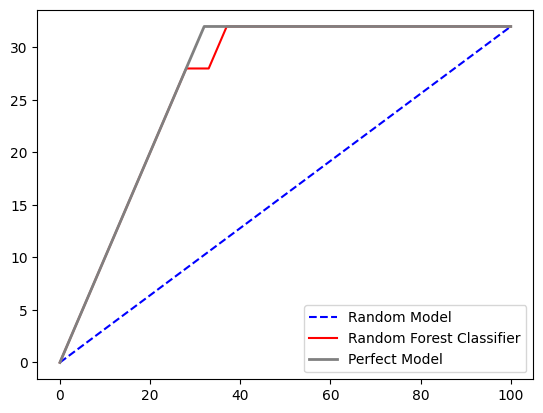

In [ ]:
total = len(y_test)
one_count = np.sum(y_test)

#sorted(zip(y_pred, y_test)) sort based on the y_pred
lm = [y for _,y in sorted(zip(y_pred, y_test), reverse=True)]

x = np.arange(0, total + 1)
#np.cumsum(lm) calculates the commulative sum
y = np.append([0], np.cumsum(lm))

plt.plot([0, total], [0, one_count], c='b', linestyle='--', label='Random Model')
plt.plot(x, y, c='r', label='Random Forest Classifier')
plt.plot([0, one_count, total], [0, one_count, one_count], c='grey', linewidth=2, label='Perfect Model')
plt.legend()
plt.show()